<a href="https://colab.research.google.com/github/bitfuzion/machine_learning_projects/blob/main/Sleep_disorder_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of the project is to analyze the person's lifestyles and medical variables such as age, BMI, physical activity, sleep duration, blood pressure and many more, to predict the sleep disorder and its type.

**About the Dataset**

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

**Key Features of the Dataset:**


Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.


Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.


Cardiovascular Health: Examine blood pressure and heart rate measurements.


Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

## Data loading




In [1]:
import pandas as pd

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Data exploration




In [2]:
# Data Shape and Summary
print("DataFrame Shape:", df.shape)
print("\nDescriptive Statistics:\n", df.describe())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Data Types
print("\nData Types:\n", df.dtypes)

# Unique Values for Categorical Features
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for feature in categorical_features:
  print(f"\nUnique values for {feature}:\n", df[feature].unique())

DataFrame Shape: (374, 13)

Descriptive Statistics:
         Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.0


Analyze the distribution of the target variable 'Sleep Disorder' and calculate the correlation between numerical features to gain insights into the data.



In [3]:
# Distribution of Target Variable
print("\nSleep Disorder Class Frequencies:\n", df['Sleep Disorder'].value_counts())

# Correlation Analysis
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Sleep Disorder Class Frequencies:
 Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

Correlation Matrix:
                               Age  Sleep Duration  Quality of Sleep  \
Age                      1.000000        0.344709          0.473734   
Sleep Duration           0.344709        1.000000          0.883213   
Quality of Sleep         0.473734        0.883213          1.000000   
Physical Activity Level  0.178993        0.212360          0.192896   
Stress Level            -0.422344       -0.811023         -0.898752   
Heart Rate              -0.225606       -0.516455         -0.659865   
Daily Steps              0.057973       -0.039533          0.016791   

                         Physical Activity Level  Stress Level  Heart Rate  \
Age                                     0.178993     -0.422344   -0.225606   
Sleep Duration                          0.212360     -0.811023   -0.516455   
Quality of Sleep                        0.192896     -0.898752

Visualizations to understand the distribution of numerical features and the distribution of categorical features, such as 'Sleep Disorder', 'Gender', and 'BMI Category'.



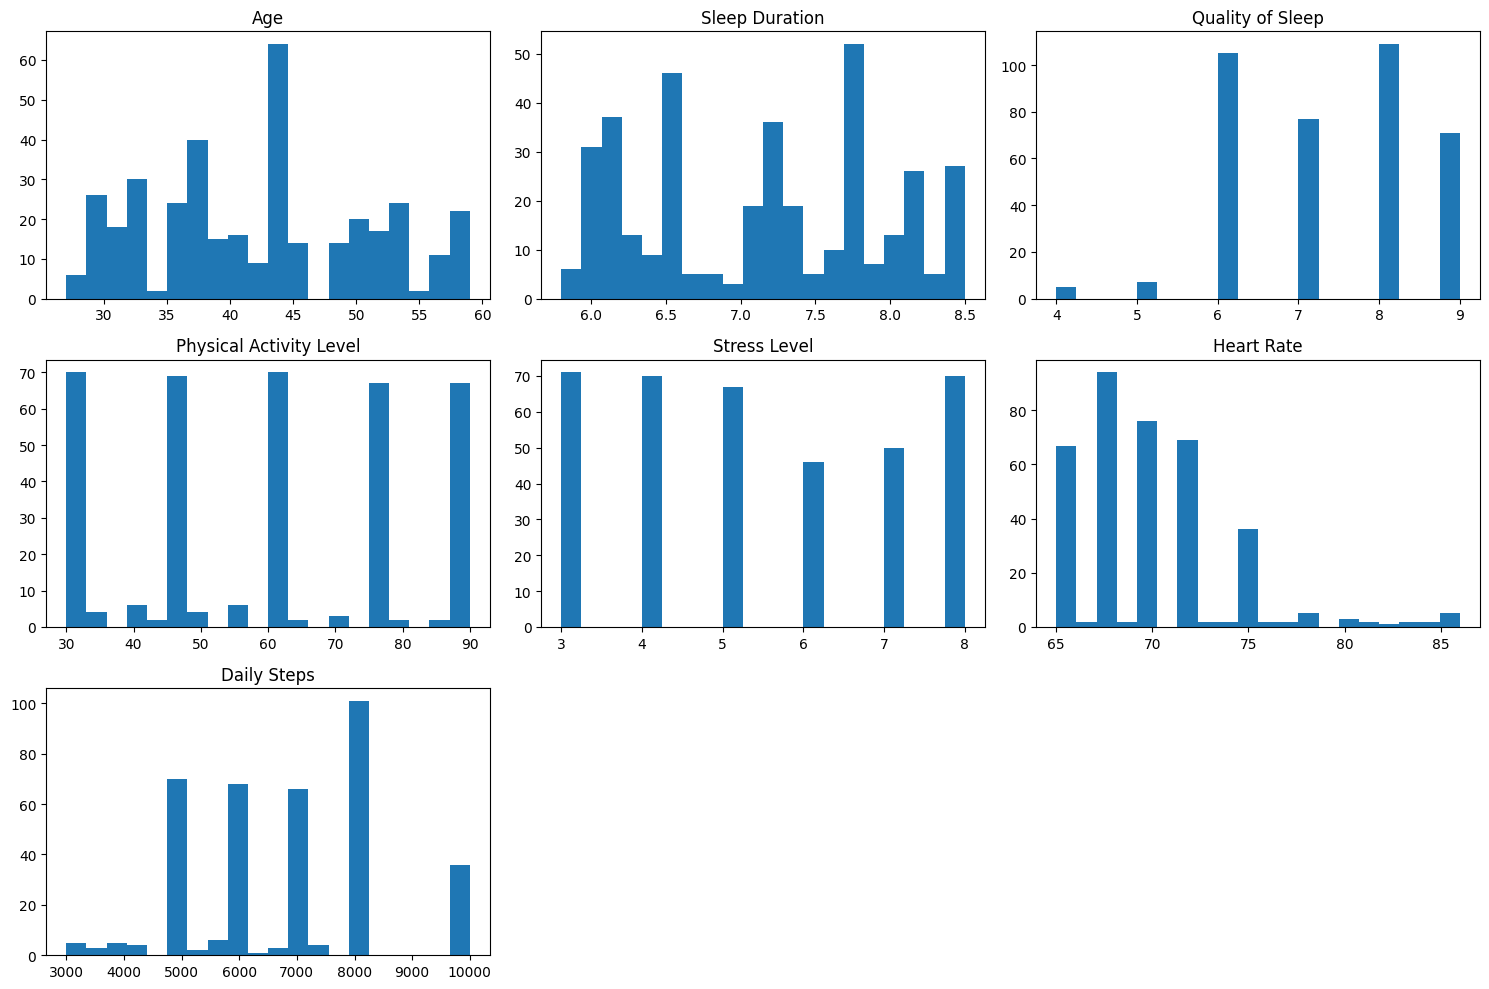

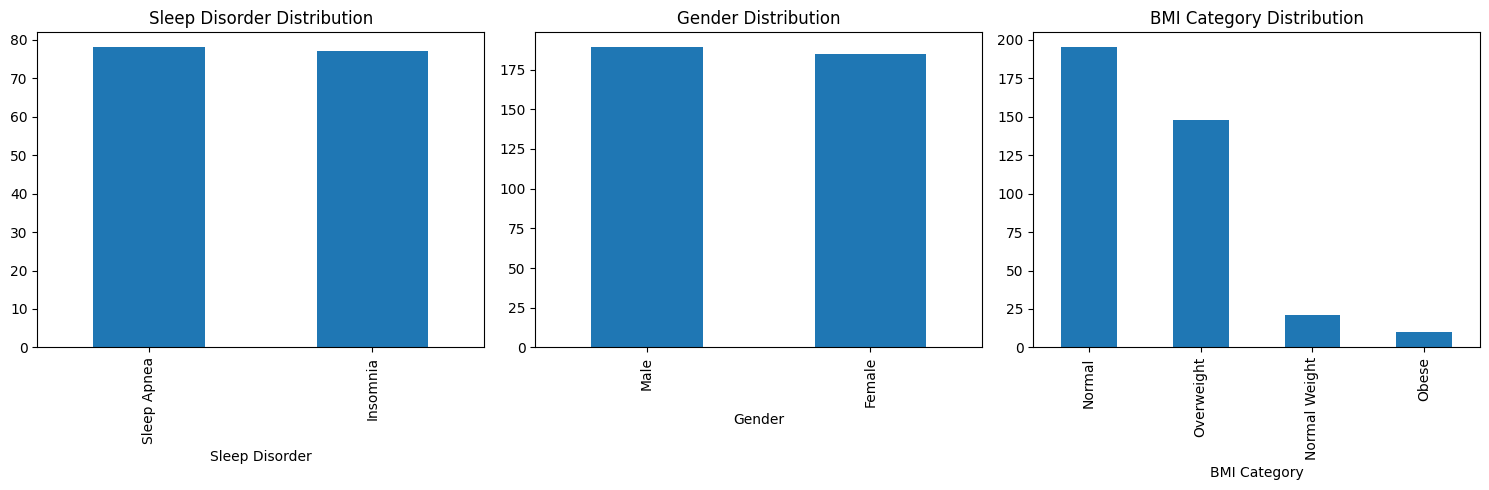

In [4]:
import matplotlib.pyplot as plt

# Distribution of Numerical Features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
  plt.subplot(3, 3, i + 1)
  plt.hist(df[feature], bins=20)
  plt.title(feature)

plt.tight_layout()
plt.show()


# Distribution of Categorical Features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['Sleep Disorder'].value_counts().plot(kind='bar')
plt.title('Sleep Disorder Distribution')

plt.subplot(1, 3, 2)
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')

plt.subplot(1, 3, 3)
df['BMI Category'].value_counts().plot(kind='bar')
plt.title('BMI Category Distribution')

plt.tight_layout()
plt.show()

## Data cleaning



In [5]:
# Missing Value Handling
# Impute missing values for columns with a small percentage of missing values
for column in df.columns:
  if df[column].isnull().sum() > 0 and df[column].isnull().sum() / len(df) < 0.05:
    if pd.api.types.is_numeric_dtype(df[column]):
      df[column].fillna(df[column].median(), inplace=True)
    else:
      df[column].fillna(df[column].mode()[0], inplace=True)


# Handle missing values in 'Sleep Disorder' column
df['Sleep Disorder'].fillna('Unknown', inplace=True)

# Outlier Handling
# Identify and handle outliers using IQR for numerical features
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                     'Stress Level', 'Heart Rate', 'Daily Steps']
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Data Consistency (check for duplicates)
df.drop_duplicates(inplace=True)

# Save cleaned DataFrame
df_cleaned = df

<ipython-input-5-97bd774edd13>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('Unknown', inplace=True)


In [6]:
# Missing Value Handling
# Impute missing values for columns with a small percentage of missing values
for column in df.columns:
  if df[column].isnull().sum() > 0 and df[column].isnull().sum() / len(df) < 0.05:
    if pd.api.types.is_numeric_dtype(df[column]):
      df[column] = df[column].fillna(df[column].median())
    else:
      df[column] = df[column].fillna(df[column].mode()[0])


# Handle missing values in 'Sleep Disorder' column
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Unknown')

# Outlier Handling
# Identify and handle outliers using IQR for numerical features
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                     'Stress Level', 'Heart Rate', 'Daily Steps']
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Data Consistency (check for duplicates)
df.drop_duplicates(inplace=True)

# Save cleaned DataFrame
df_cleaned = df

## Data wrangling




In [7]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical features
categorical_features = ['Gender', 'Occupation', 'BMI Category']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(df_cleaned[categorical_features])

# Create a new DataFrame with the encoded features
feature_names = encoder.get_feature_names_out(categorical_features)
df_encoded = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the encoded features with the original DataFrame
df_encoded = pd.concat([df_cleaned, df_encoded], axis=1)

# Drop the original categorical features
df_encoded.drop(categorical_features, axis=1, inplace=True)

# Handle the target variable 'Sleep Disorder' using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['Sleep Disorder'] = label_encoder.fit_transform(df_encoded['Sleep Disorder'])

display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Overweight
0,1.0,27.0,6.1,6.0,42.0,6.0,126/83,77.0,4200.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,28.0,6.2,6.0,60.0,8.0,125/80,75.0,10000.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,28.0,6.2,6.0,60.0,8.0,125/80,75.0,10000.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,8.0,29.0,7.8,7.0,75.0,6.0,120/80,70.0,8000.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,9.0,29.0,7.8,7.0,75.0,6.0,120/80,70.0,8000.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Feature engineering



In [8]:
# Create interaction terms
df_encoded['SleepDuration_StressLevel'] = df_encoded['Sleep Duration'] * df_encoded['Stress Level']
df_encoded['PhysicalActivity_SleepDuration'] = df_encoded['Physical Activity Level'] * df_encoded['Sleep Duration']

# Create polynomial features
df_encoded['SleepDuration_Squared'] = df_encoded['Sleep Duration'] ** 2
df_encoded['StressLevel_Squared'] = df_encoded['Stress Level'] ** 2

# Create a new feature based on domain knowledge: Ratio of Physical Activity Level to Sleep Duration
df_encoded['ActivitySleepRatio'] = df_encoded['Physical Activity Level'] / df_encoded['Sleep Duration']

# Display the first few rows of the updated DataFrame
display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Overweight,SleepDuration_StressLevel,PhysicalActivity_SleepDuration,SleepDuration_Squared,StressLevel_Squared,ActivitySleepRatio
0,1.0,27.0,6.1,6.0,42.0,6.0,126/83,77.0,4200.0,2,...,1.0,0.0,0.0,0.0,1.0,36.6,256.2,37.21,36.0,6.885246
1,2.0,28.0,6.2,6.0,60.0,8.0,125/80,75.0,10000.0,2,...,0.0,0.0,1.0,0.0,0.0,49.6,372.0,38.44,64.0,9.677419
2,3.0,28.0,6.2,6.0,60.0,8.0,125/80,75.0,10000.0,2,...,0.0,0.0,1.0,0.0,0.0,49.6,372.0,38.44,64.0,9.677419
7,8.0,29.0,7.8,7.0,75.0,6.0,120/80,70.0,8000.0,2,...,0.0,0.0,1.0,0.0,0.0,46.8,585.0,60.84,36.0,9.615385
8,9.0,29.0,7.8,7.0,75.0,6.0,120/80,70.0,8000.0,2,...,0.0,0.0,1.0,0.0,0.0,46.8,585.0,60.84,36.0,9.615385


In [10]:
# Convert 'Blood Pressure' to two separate columns
df_encoded[['Systolic_BP', 'Diastolic_BP']] = df_encoded['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original 'Blood Pressure' column
df_encoded.drop('Blood Pressure', axis=1, inplace=True)

# Calculate the correlation matrix again
correlation_matrix = df_encoded.corr()['Sleep Disorder']
print(correlation_matrix)

Person ID                        -0.390331
Age                              -0.349065
Sleep Duration                    0.378710
Quality of Sleep                  0.339044
Physical Activity Level           0.091575
Stress Level                     -0.167108
Heart Rate                       -0.133136
Daily Steps                       0.092046
Sleep Disorder                    1.000000
Gender_Female                    -0.148413
Gender_Male                       0.148413
Occupation_Accountant             0.104697
Occupation_Doctor                 0.276034
Occupation_Engineer              -0.134364
Occupation_Lawyer                 0.185359
Occupation_Manager               -0.092416
Occupation_Nurse                 -0.081947
Occupation_Salesperson           -0.214981
Occupation_Scientist              0.044440
Occupation_Software Engineer      0.054504
Occupation_Teacher               -0.191100
BMI Category_Normal               0.333072
BMI Category_Normal Weight        0.096642
BMI Categor

The correlation analysis showed that some of the newly engineered features have a moderate correlation with the target variable. Now, we can train a simple model (e.g., a linear regression model) with the newly engineered features and evaluate the model's performance to see if these features improve the model's ability to predict sleep disorders. However, we need to handle the target variable as it's a multi-class classification problem. Also, we can't use linear regression directly for multi-class classification. Instead, we can use a simple logistic regression model.



In [12]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       1.00      0.83      0.91        12
           2       0.90      0.94      0.92        47
           3       0.00      0.00      0.00         3

    accuracy                           0.88        75
   macro avg       0.66      0.67      0.66        75
weighted avg       0.85      0.88      0.86        75



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Prepare the data
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.83      0.83      0.83        12
           2       1.00      0.96      0.98        47
           3       1.00      1.00      1.00         3

    accuracy                           0.93        75
   macro avg       0.91      0.93      0.92        75
weighted avg       0.94      0.93      0.93        75




The Random Forest Classifier model has shown better performance compared to the Logistic Regression model. We can further investigate feature importance to understand which features contribute the most to the model's predictions. This can help us refine the model or potentially identify new features that might be beneficial.



In [15]:
# Get feature importance
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': df_encoded.drop('Sleep Disorder', axis=1).columns, 'Importance': feature_importances})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the top 10 most important features
display(feature_importance_df.head(10))

,Feature,Importance
0,Person ID,0.186851
29,Diastolic_BP,0.121587
28,Systolic_BP,0.116103
1,Age,0.083335
2,Sleep Duration,0.080690
25,SleepDuration_Squared,0.064103
27,ActivitySleepRatio,0.050112
3,Quality of Sleep,0.039131
24,PhysicalActivity_SleepDuration,0.038020
23,SleepDuration_StressLevel,0.037520


## Data splitting




In [16]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']

# Split the data into training and combined validation/testing sets
X_train, X_combined, y_train, y_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Further split the combined validation/testing set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_combined, y_combined, test_size=0.5, random_state=42
)

## Model training




In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Instantiate a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy}")
print(classification_report(y_val, y_val_pred))

Validation Accuracy: 0.8648648648648649
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       0.71      0.71      0.71         7
           2       1.00      0.88      0.93        24
           3       1.00      1.00      1.00         1

    accuracy                           0.86        37
   macro avg       0.83      0.90      0.85        37
weighted avg       0.90      0.86      0.87        37



## Model optimization

Optimize the hyperparameters of the trained Random Forest model to improve its performance.


In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the Random Forest model and parameter grid
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=5  # Use 5-fold cross-validation
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding performance on the validation set
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Validation Accuracy: 0.9229943502824858


## Model evaluation



Accuracy: 0.9473684210526315
Precision: 0.9517543859649124
Recall: 0.9473684210526315
F1-score: 0.9482721956406167

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.83      1.00      0.91         5
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00         2

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.95      0.95      0.95        38



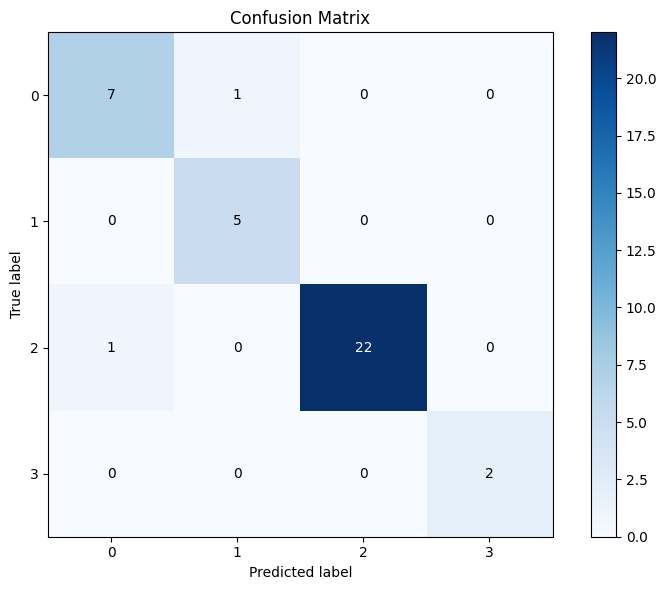

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate a classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



### 1. Data Analysis Key Findings

* **Missing Values:** The 'Sleep Disorder' column had a significant number of missing values (58.56%), which were handled by imputing them with 'Unknown'.
* **Class Imbalance:** The 'Sleep Disorder' variable showed a class imbalance, with 'Sleep Apnea' and 'Insomnia' being the most common disorders.
* **Correlation:**  Numerical features like 'Sleep Duration', 'Quality of Sleep', and 'Stress Level' showed strong correlations.
* **Model Optimization:** Hyperparameter optimization using GridSearchCV improved the Random Forest model's validation accuracy to 0.923.
* **Test Set Performance:** The optimized Random Forest model achieved a high accuracy of 0.947 on the test set, along with high precision, recall, and F1-score.


### 2. Insights or Next Steps

* **Further improve model performance:** Explore techniques like oversampling or undersampling to address the class imbalance, investigate different feature engineering approaches, and experiment with different model architectures (e.g., XGBoost, SVM).
* **Deployment and monitoring:** Evaluate the model's performance in a real-world setting and monitor its performance over time to identify any degradation or need for retraining.
